# Problema: Dataset de pingüinos: Este problema es entregable

Carga el sigiuente dataset y responde las siguientes preguntas:

```python
import pandas as pd
import seaborn as sns

# Cargar el dataset
df = sns.load_dataset('penguins')
```
Estas preguntas los guiarán a realizar un análisis descriptivo del dataset y a realizar un test de hipótesis.

## Primera aproximación a los datos de forma general y su limpieza:

1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie? 
2. ¿Hay valores faltantes en las variables? Determine una estrategie de limpieza y apliquela.
3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?
4. Repita la pregunta anterior observando las especies.

## Tendencias y visualizacion de las variables

5. ¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie? 
6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos? 
8. Describa la distribucion con ayuda de la media, desviacion estandard 
9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras? 

10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie? 
11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?


## Relación entre caracteristicas de los pingüinos

14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.

15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?



## Test de hipótesis

17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones. 
















In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("whitegrid")

# **RESPUESTAS**

In [2]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
df.shape

(344, 7)

## **Primera aproximación a los datos de forma general y su limpieza**

### **1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Qué características de los pingüínos se dan para cada especie?**

In [4]:
numero_especies = len(df.species.unique())
print(f"El número de especies diferentes de pingüinos es: {numero_especies} especies")

El número de especies diferentes de pingüinos es: 3 especies


Por su parte, las características que se dan para cada especie son: longitud del pico, profundidad del pico, longitud de la aleta (todo en milímetros). Además, se da la masa corporal de los pingüinos (en gramos) y el sexo del pingüino (Macho | Hembra)

### **2. ¿Hay valores faltantes en las variables? Determine una estrategie de limpieza y aplíquela.**

In [5]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Según lo observado, sí hay datos faltantes. Podemos reemplazar los datos numéricos por cero, usando df.fillna(0). Sin embargo, esto podría generar algunos problemas, teniendo en cuenta que estos datos representan magnitudes que nunca son cero (No tiene sentido un tamaño de pico cero y menos una masa corporal cero). Además, no podríamos hacer esto para los datos de sexo, los cuales son tipo string. 

Por ello, opto por la opción de eliminar los registros que tienen datos NaN.

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [8]:
df.shape

(333, 7)

Una vez limpios los datos, se crean tres dataframes para las tres especies diferentes.

In [9]:
df_adelie = df[df['species'] == 'Adelie'].copy()
df_gentoo = df[df['species'] == 'Gentoo'].copy()
df_chinstrap = df[df['species'] == 'Chinstrap'].copy()

data_species = [df_adelie, df_gentoo, df_chinstrap]

### **3. ¿Cuál es la isla con mayor número de pingüínos en el dataset? ¿Hay un desbalance en número en el número de pingüínos por isla?**

In [10]:
islas = df.island.unique()
cuentas_islas = df.groupby('island').species.count()

for isla in islas:
    print(f"El número de pingüinos en la isla {isla} es: {cuentas_islas[isla]} pingüinos")

El número de pingüinos en la isla Torgersen es: 47 pingüinos
El número de pingüinos en la isla Biscoe es: 163 pingüinos
El número de pingüinos en la isla Dream es: 123 pingüinos


Con lo observado se puede afirmar que la isla con mayor cantidad de pingüínos es la isla Biscoe. Además, la isla Torgersen tiene aproximadamente 3 veces menos pingüinos que las demás islas, evidenciando un desbalance en el número de pingüínos.

### **4. Repita la pregunta anterior observando las especies.**

In [11]:
species = df.species.unique()
cuentas_especies = df.groupby('species').island.count()

for specie in species:
    print(f"El número de pingüinos de la especie {specie} es: {cuentas_especies[specie]} pingüinos")

El número de pingüinos de la especie Adelie es: 146 pingüinos
El número de pingüinos de la especie Chinstrap es: 68 pingüinos
El número de pingüinos de la especie Gentoo es: 119 pingüinos


Como vemos, se observa un desbalance similar para la especie Chinstrap, la cual tiene aproximadamente dos veces menos ejemplares que las otras especies. La especie con mayor número de ejemplares es la Adelie.

---

## **Tendencias y visualizacion de las variables**

### **5. ¿Cuál es la longitud media y la desviación estandard del tamaño del pico de los pingüínos por especie?**

In [12]:
longitud_media = df.groupby('species').mean()['bill_length_mm']
tamaño_std = df.groupby('species').std()['bill_depth_mm']

In [13]:
print(f"Longitud media: \n\n{longitud_media}")
print("\n")
print(f"Desviación estándar: \n\n{tamaño_std}")

Longitud media: 

species
Adelie       38.823973
Chinstrap    48.833824
Gentoo       47.568067
Name: bill_length_mm, dtype: float64


Desviación estándar: 

species
Adelie       1.219338
Chinstrap    1.135395
Gentoo       0.985998
Name: bill_depth_mm, dtype: float64


### **6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?**

Para responder esta pregunta, necesitamos primero agrupar los datos del dataframe por especies y extraer los máximos de cada columna.

In [14]:
a = df.groupby('species').max()
a = a[['island', 'bill_length_mm', 'body_mass_g', 'sex']].copy()
a

,island,bill_length_mm,body_mass_g,sex
species,,,,
Adelie,Torgersen,46.0,4775.0,Male
Chinstrap,Dream,58.0,4800.0,Male
Gentoo,Biscoe,59.6,6300.0,Male


Luego, al dataframe `a` lo ordenamos por el valor de la columna de interés (`bill_length_mm`) y de forma descendente. Almacenamos este dataframe transformado en ``b``.

In [17]:
b = a.sort_values(by=['bill_length_mm'], ascending=False).copy()
b

,island,bill_length_mm,body_mass_g,sex
species,,,,
Gentoo,Biscoe,59.6,6300.0,Male
Chinstrap,Dream,58.0,4800.0,Male
Adelie,Torgersen,46.0,4775.0,Male


Posteriormente, como sabemos que el dataframe está ordenado de mayor a menor longitud de pico, filtramos `b` por la columna por su primer fila, y obtenemos toda la información del pingüino y almacenamos en `c`, esto nos retorna una serie de pandas.

In [18]:
c = b.iloc[0].copy()
c

island            Biscoe
bill_length_mm      59.6
body_mass_g       6300.0
sex                 Male
Name: Gentoo, dtype: object

In [19]:
sex = c.sex
specie = c.name
mass = c.body_mass_g
island = c.island
bill = c.bill_length_mm

print(f"El pingüino con el pico más largo es un {sex} de la especie {specie} con un peso de {mass} g que vive en la isla {island}.\nLa longitud de su pico es de {bill} mm.")  

El pingüino con el pico más largo es un Male de la especie Gentoo con un peso de 6300.0 g que vive en la isla Biscoe.
La longitud de su pico es de 59.6 mm.


### **7. ¿Cómo es la distribución de la masa corporal entre las especies de pingüínos?**

In [21]:
df.set_index('species')

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...
Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male


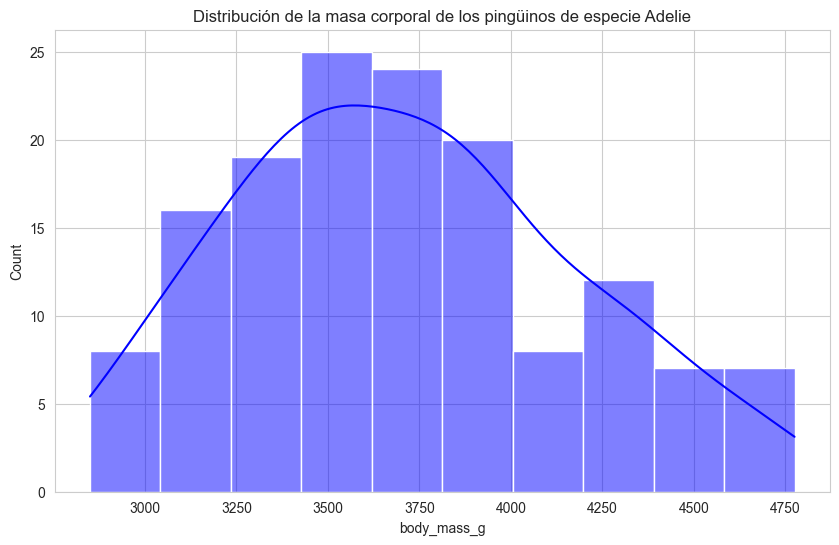

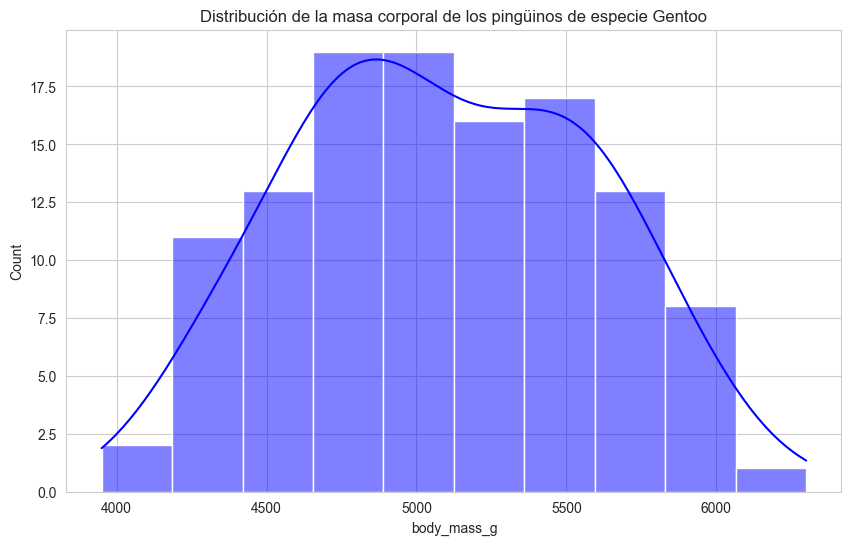

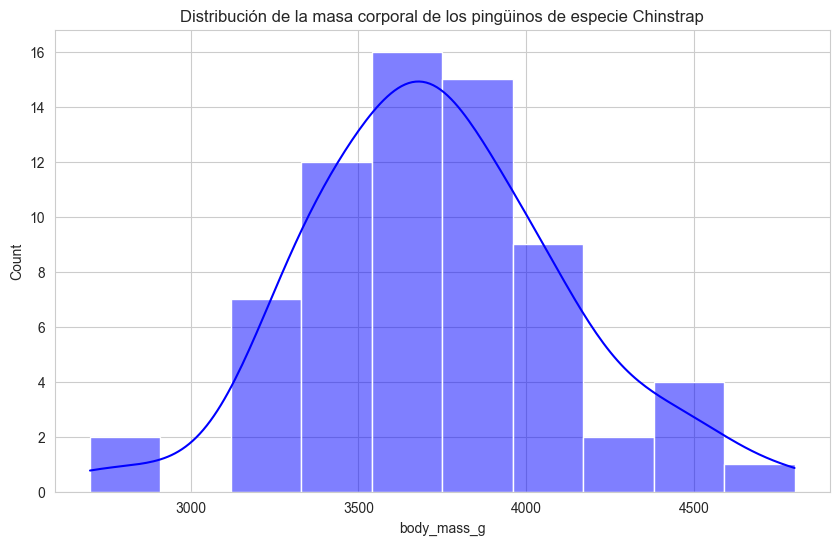

In [22]:
for specie in data_species:
    plt.figure(figsize=(10,6))
    # df[df['species'] == specie]['body_mass_g'].plot(kind='hist', figsize=(10, 5), title=f'Distribución de la masa corporal de los pingüinos de especie {specie}', color='blue')
    name = specie.species.unique()[0]
    data = specie['body_mass_g']
    
    sns.histplot(data, bins=10, kde=True, color='blue')
    plt.title(f'Distribución de la masa corporal de los pingüinos de especie {name}')
    plt.xlabel('body_mass_g')
    plt.show()

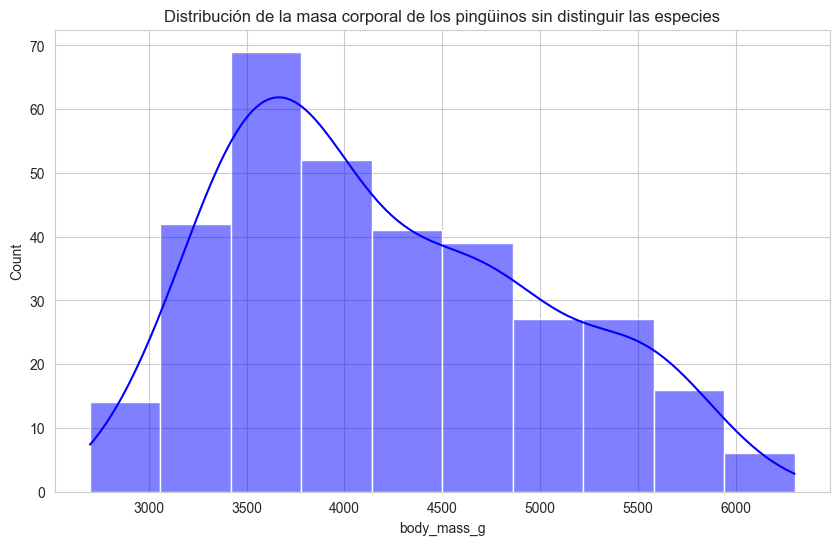

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(df['body_mass_g'], bins=10, kde=True, color='blue')
plt.title(f'Distribución de la masa corporal de los pingüinos sin distinguir las especies')
plt.xlabel('body_mass_g')
plt.show()

### **8. Describa la distribución con ayuda de la media, desviación estandard**

In [29]:
df.groupby('species').agg({'body_mass_g': ['mean', 'std']}).round(2)

body_mass_g        
                 mean     std
species                      
Adelie        3706.16  458.62
Chinstrap     3733.09  384.34
Gentoo        5092.44  501.48

A partir de la media, podemos observar que la masa corporal de la especie Gentoo tiende a ser menor que las otras (las cuales son muy similares entre sí). Sin embargo, a su vez, los datos de esta especie están más dispersos, por lo que no sería raro que algún ejemplar de esta especie pueda llegar a tener una masa corporal similar a muchos ejemplares de las otras dos especies (Adelie, Chinstrap).

### **9. ¿Cuál es la diferencia en masa corporal promedio y desviación estandard entre machos y hembras?**

In [32]:
df.groupby('sex').agg({'body_mass_g': ['mean', 'std']}).round(2)

body_mass_g        
              mean     std
sex                       
Female     3862.27  666.17
Male       4545.68  787.63

### **10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?**

In [33]:
df.groupby('species').agg({'flipper_length_mm': ['mean', 'std']}).round(2)

flipper_length_mm      
                       mean   std
species                          
Adelie               190.10  6.52
Chinstrap            195.82  7.13
Gentoo               217.24  6.59

### **11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?**

In [34]:
df.groupby('species').agg({'flipper_length_mm': ['min', 'max']}).round(2)

flipper_length_mm       
                        min    max
species                           
Adelie                172.0  210.0
Chinstrap             178.0  212.0
Gentoo                203.0  231.0

### **12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?**

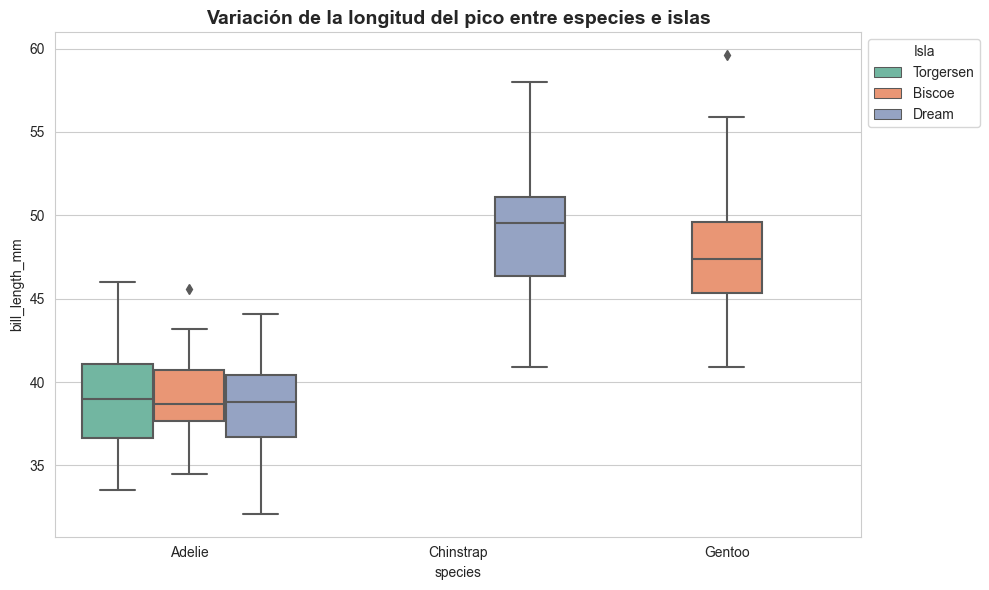

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x="species",
    y="bill_length_mm",
    hue="island",
    palette="Set2"
)
plt.title("Variación de la longitud del pico entre especies e islas", fontsize=14, weight="bold")
plt.ylabel("bill_length_mm")
plt.xlabel("species")
plt.legend(title="Isla", loc="upper left", bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

### **13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?**

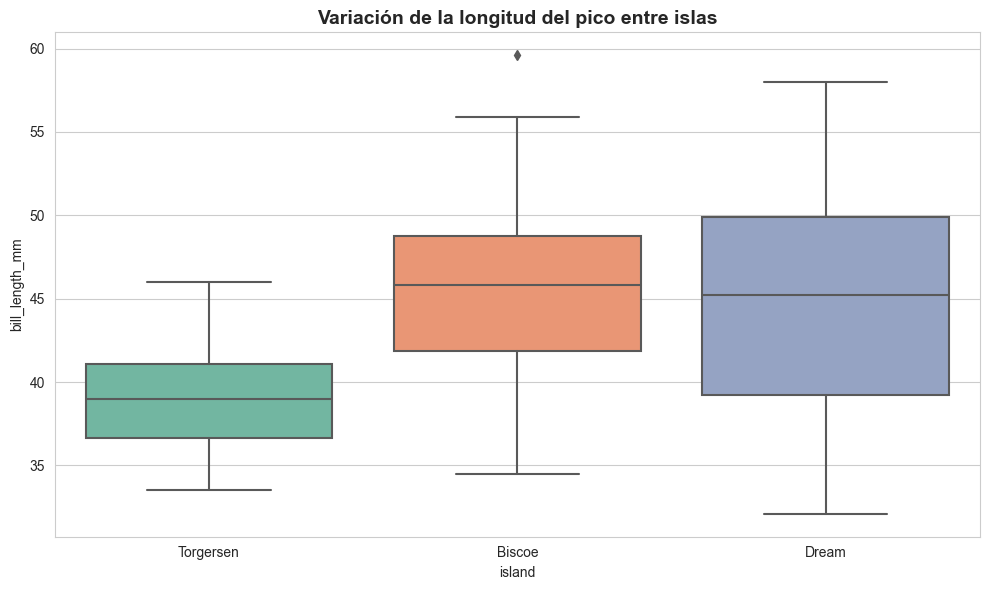

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x="island",
    y="bill_length_mm",
    palette="Set2"
)
plt.title("Variación de la longitud del pico entre islas", fontsize=14, weight="bold")
plt.ylabel("bill_length_mm")
plt.xlabel("island")
# plt.legend(title="Isla", loc="upper left", bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

A partir de los gráficos de caja, podemos inferir que la isla con la mayor variación en la longitud del pico es la isla Dream.

## **Relación entre caracteristicas de los pingüinos**

### **14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.**

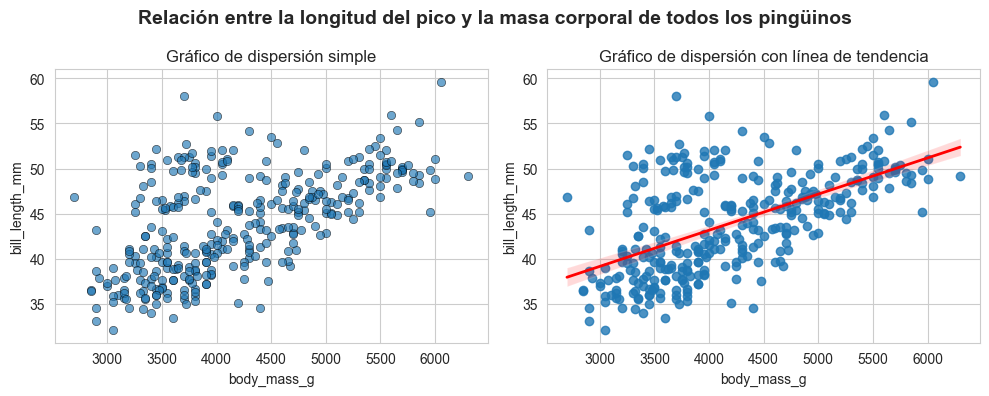

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

sns.scatterplot(x='body_mass_g',
                y='bill_length_mm',
                data=df,
                edgecolor='black',
                alpha=0.65,
                ax=ax[0])
ax[0].set_title("Gráfico de dispersión simple")


sns.regplot(x='body_mass_g',
            y='bill_length_mm',
            data=df,
            scatter=True,
            line_kws={'linewidth':2, 'color':'red'},
            ax=ax[1])
ax[1].set_title("Gráfico de dispersión con línea de tendencia")

fig.suptitle("Relación entre la longitud del pico y la masa corporal de todos los pingüinos", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

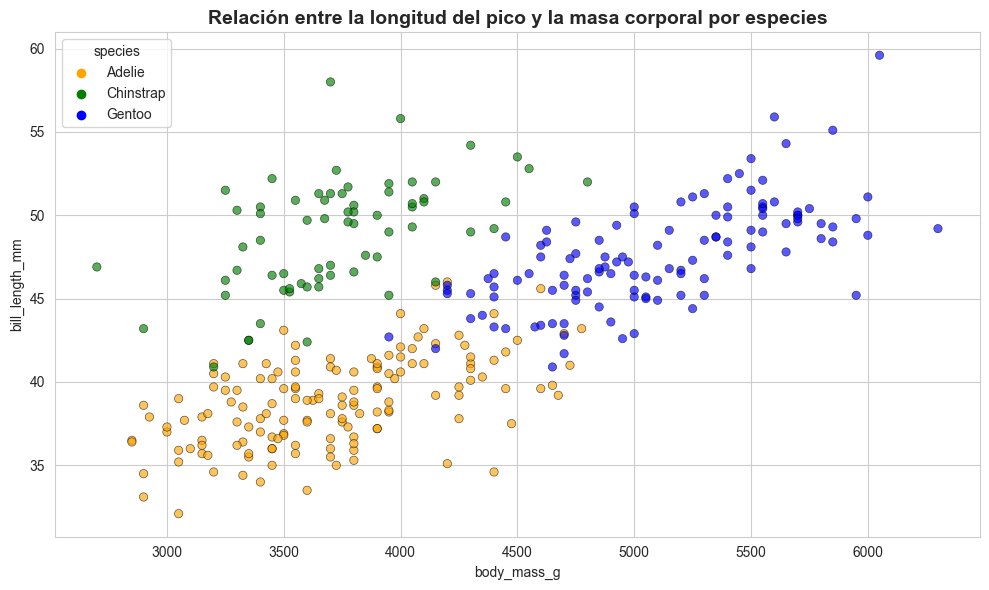

In [38]:
fig = plt.figure(figsize=(10,6))

sns.scatterplot(x='body_mass_g',
                y='bill_length_mm',
                data=df,
                edgecolor='black',
                palette=['orange', 'green', 'blue'],
                alpha=0.65,
                hue='species')

plt.title("Relación entre la longitud del pico y la masa corporal por especies", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

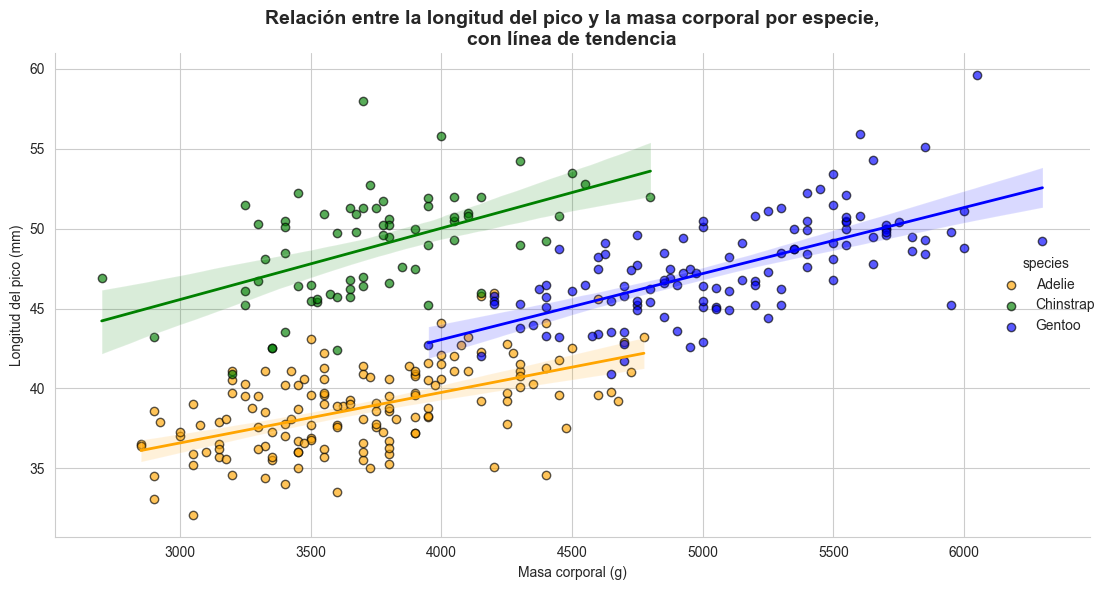

In [39]:
# lmplot crea un FacetGrid internamente, separando por hue y dibujando regresión
sns.lmplot(
    data=df,
    x='body_mass_g',
    y='bill_length_mm',
    hue='species',
    height=6,
    aspect=10/6,        # misma proporción que figsize=(10,6)
    #markers=['o', 's', 'D'],   # distintos marcadores por especie
    palette=['orange', 'green', 'blue'],#'Set1',
    scatter_kws={'edgecolor':'black', 'alpha':0.65},
    line_kws={'linewidth':2}
)

plt.title("Relación entre la longitud del pico y la masa corporal por especie,\ncon línea de tendencia",
          fontsize=14, weight="bold")
plt.xlabel("Masa corporal (g)")
plt.ylabel("Longitud del pico (mm)")
plt.tight_layout()
plt.show()

### **15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?**

In [50]:
# Para este análisis, usamos el método corr de pandas que directamente calcula el coeficiente de Pearson

corr = df.groupby('species').agg(corr_mass_bill = ('body_mass_g', 
                                                    lambda x: x.corr(df.loc[x.index, 'bill_length_mm'])))
corr.round(2)

,corr_mass_bill
species,
Adelie,0.54
Chinstrap,0.51
Gentoo,0.67


A partir de los valores del coeficiente de Pearson (r) para cada especie, podemos inferir lo siguiente:

- Gentoo (0.67): Se presenta una correlación positiva moderada-alta: a mayor masa corporal, mayor longitud del pico, con una relación lineal relativamente fuerte.

- Adelie (0.54): Correlación positiva moderada: existe una tendencia clara, pero con más dispersión que en la especie Gentoo.

- Chinstrap (0.51): Correlación positiva moderada, ligeramente más baja que Adelie, pero con la misma tendencia de correlación.

Todos estos valores refuerzan la información que se puede extraer de las gráficas de dispersión.

### **16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?**

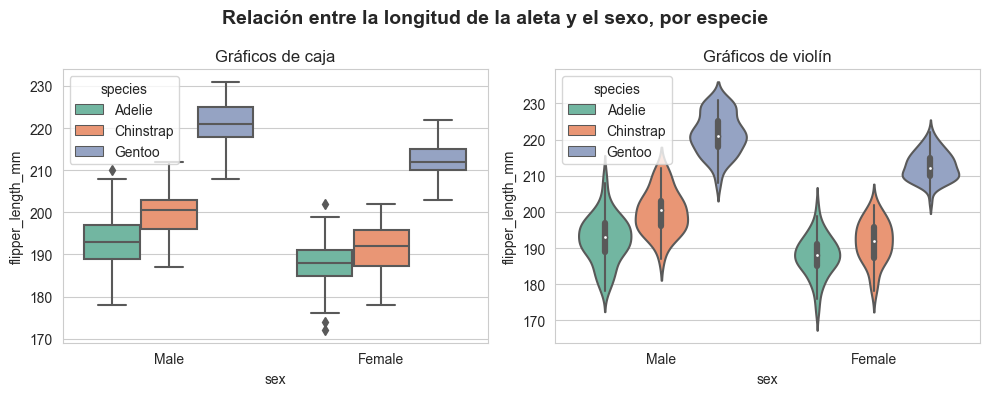

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

sns.boxplot(
    data=df,
    x="sex",
    y="flipper_length_mm",
    palette="Set2",
    hue='species',
    ax=ax[0]
)
ax[0].set_xlabel("sex")
ax[0].set_ylabel("flipper_length_mm")
ax[0].set_title("Gráficos de caja")

sns.violinplot(
    data=df,
    x="sex",
    y="flipper_length_mm",
    palette="Set2",
    hue='species',
    ax=ax[1]
)
ax[1].set_xlabel("sex")
ax[1].set_ylabel("flipper_length_mm")
ax[1].set_title("Gráficos de violín")

fig.suptitle("Relación entre la longitud de la aleta y el sexo, por especie", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

A simple vista, se nota que, en cada especie, las aletas de las hembras tienden a ser más grandes que las de los machos. La especie que tiene el pico más grande es el Gentoo, después Chinstrap y por último, Adelie.


## **Test de hipótesis**

### **17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.**

In [71]:
import scipy.stats as stats

Vamos a hacer un test de hipótesis desde dos enfoques. Primero sobre los datos totales, y luego centrándonos en la especie Chinstrap. Para ambos enfoques las hipótesis nulas y alternativas serán las mismas, y analizaremos la masa corporal y la longitud del pico.

- **Hipótesis nula** $ H_0 $: no hay correlación real entre las características elegidas ($\rho = 0 $).
- **Hipótesis alternativa** $ H_1 $: sí hay correlación entre las características ($ \rho \neq 0 $).

Antes de todo, calculemos el coeficiente de correlación de Pearson.

In [89]:
def correlation_analysis(X, Y):

    xus=(X-np.mean(X))/np.std(X)
    yus=(Y-np.mean(Y))/np.std(Y)

    n = len(X)
    r = (yus*xus).mean()

    t = (r*np.sqrt(n-2))/(np.sqrt(1-r**2))
    intervalo = stats.t.interval(0.95, n-2, loc=0, scale=1)

    

    return r, t, intervalo

Empecemos, primero, con el test de hipótesis para los datos completos.

In [73]:
body_mass = df['body_mass_g']
bill_length = df['bill_length_mm']

In [90]:
r, t, intervalo = correlation_analysis(body_mass, bill_length)

In [91]:
print(f'El coeficiente de correlación lineal para los datos de todas las especies es: {r.round(3)}')

El coeficiente de correlación lineal para los datos de todas las especies es: 0.589


In [93]:
print(f'El estimador es: {t.round(3)}')
print(f'El intervalo es: [ {intervalo[0].round(4)} , {intervalo[1].round(4)}]')

El estimador es: 13.276
El intervalo es: [ -1.9672 , 1.9672]


El estimador está fuera del intervalo y la hipotesis nula de no correlacion se rechaza. Por lo tanto sí hay correlación real entre la masa corporal y la longitud del pico, cuando hablamos de todas las especies.

Ahora, pasemos a hacer el test de hipótesis para el caso en que tomamos los datos únicamente de la especie Chinstrap. Lo haré un poco más rápido en este caso.

In [95]:
body_mass_c = df_chinstrap['body_mass_g']
bill_length_c = df_chinstrap['bill_length_mm']

In [101]:
r, p = stats.pearsonr(body_mass_c, bill_length_c)

In [110]:
print(f'El coeficiente de correlación lineal para los datos de la especie Chinstrap es: {r.round(4)}')

El coeficiente de correlación lineal para los datos de la especie Chinstrap es: 0.5136


In [111]:
print(f'El valor p para los datos de la especie Chinstrap es: {p.round(4)}')

El valor p para los datos de la especie Chinstrap es: 0.0


En este caso, también debemos rechazar la hipótesis nula, y asumir correlación no debida a aleatoriedad entre la masa corporal y la longitud del pico de los Chinstrap.